In [65]:
import os
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hac

In [24]:
def transform_ts(x, maxTT):

    minx = min(x)  
    x    = [xx - minx for xx in x] 
    maxx = max(x)
    x    = [xx * maxTT / maxx for xx in x]
    
    return x


def getBinnedDistribution(x, y, nbins):

    n, bins = np.histogram(x, bins=nbins)
    sy, _   = np.histogram(x, bins=nbins, weights=y)
    mean    = sy/n

    return _, mean

In [26]:
maturity   = 'senior_8_12'
method     = 'complete'
city       = 'london'
outfolder  = '../ProcessedData/' + city + '/timeseries/' + maturity  


In [27]:
city       = 'london'
infile     = '../ProcessedData/' + city + '/timeseries/senior_timeseries_8_12.dat'
venues_ts  = {}


for ind, line in enumerate(open(infile)):
    fields = line.strip().split('\t')
    venue  = fields[0]
    ts     = fields[1:]
    venues_ts[venue] = savgol_filter(np.asarray([float(fff) for fff in ts  ] ), 7, 3) 
print ind
len(venues_ts)

4460


4461

set([133, 872, 106, 818, 179, 150, 763, 796, 575])
set([196, 133, 872, 106, 818, 179, 150, 763, 796, 575])


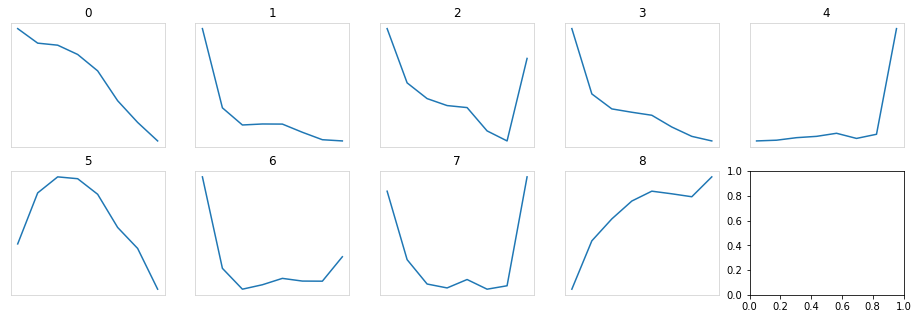

In [308]:
folder   = '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10'
files    = [folder + '/' + f for f in os.listdir(folder) if '4392' in f]
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

ys = set()
curve      = []
curvefiles = {}

for ind, fn in enumerate(files):
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        x    = [float(xx) for xx in x.split('\t')]
        ys.add(y)
        curvefiles[y] = fn


curves, curvefiles = zip(*[(yyy, curvefiles[yyy]) for yyy in list(ys) ])
        
curves = [[float(yy) for yy in y.split('\t')]  for y in curves ]

 
   
for ind, c in enumerate(curves):
    ax[indicies[ind]].plot(x,c)
    
    ax[indicies[ind]].set_title(str(ind))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
        



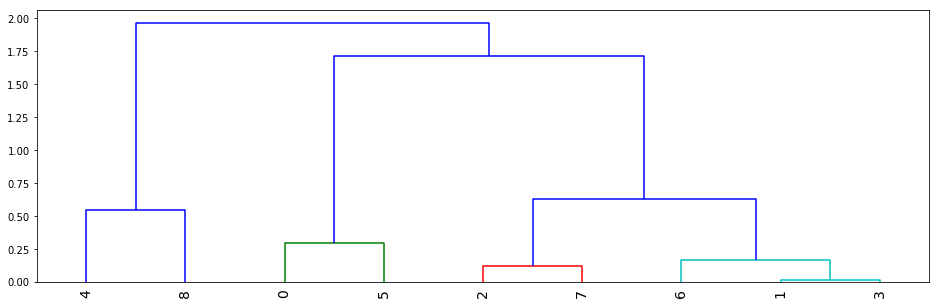

In [309]:
from dtw import dtw
from numpy.linalg import norm

'''for ind,c1 in enumerate(curves):
    for jind,c2 in enumerate(curves):
        if ind != jind:
            p1 = np.asarray(c1).reshape(-1, 1)
            p2 = np.asarray(c2).reshape(-1, 1)

            dist, cost, acc, path = dtw(p1,p2, dist=lambda p1, p2: norm(p1 - p2, ord=1))
            print ind, jind, dist 
'''
            
#p1 = np.asarray(curves[0]).reshape(-1, 1)
#p2 = np.asarray(curves[1]).reshape(-1, 1)
#dist, cost, acc, path = dtw(p1,p2, dist=lambda p1, p2: norm(p1 - p2, ord=1))

f, ax    = plt.subplots(1, 1, figsize=(16, 5)) 
  
    
def mydist(p1, p2):
    
    p1 = np.asarray(p1).reshape(-1, 1)
    p2 = np.asarray(p2).reshape(-1, 1)

    dist, cost, acc, path = dtw(p2, p1, dist=lambda p1, p2: norm(p1 - p2, ord=1))

    return dist


Z = hac.linkage(curves, method='complete', metric='correlation')
d = hac.dendrogram( Z, ax = ax,color_threshold = 0.4,  leaf_rotation=90.,  leaf_font_size=14., show_leaf_counts = True, no_labels = False)
    

9
7


['../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_5_4392_venuesnum=796.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_0_4392_venuesnum=150.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_8_4392_venuesnum=818.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=763.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=106.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=872.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=179.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_2_4392_venuesnum=133.dat',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_3_4392_venuesnum=575.dat']

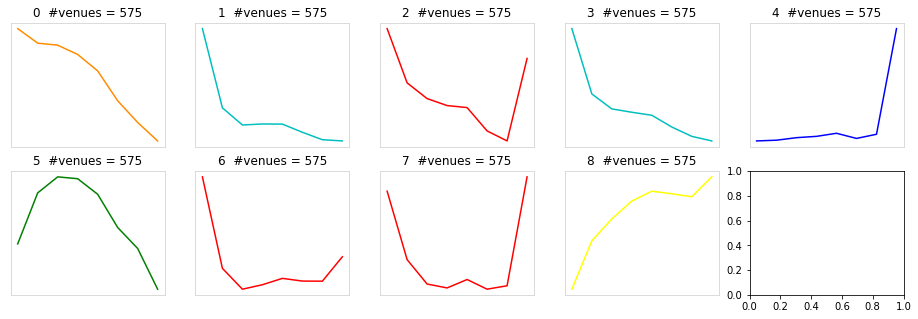

In [287]:
colors = {  4 : 'b',
            8 : 'yellow',
            0 : 'darkorange',
            5 : 'g',
            2 : 'r',
            7 : 'r',
            6 : 'r',
            1 : 'c',
            3 : 'c'
}


curves_files = {}


folder   = '../ProcessedData/london/timeseries/senior_8_12/avg_curves/10'
files    = [folder + '/' + f for f in os.listdir(folder) if '4392' in f]
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

ys = set()
curve= []

for ind, fn in enumerate(files):
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        x = [float(xx) for xx in x.split('\t')]
        
        curves_files[y] = fn
        
        ys.add(y)

        
curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]
 
for ind, c in enumerate(curves):
    ax[indicies[ind]].plot(x,c, color = colors[ind])
    
    ax[indicies[ind]].set_title(str(ind)+ '  #venues = ' + str(len(venues)))
    ax[indicies[ind]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ind]].spines['top'].set_color('lightgrey')
    ax[indicies[ind]].spines['left'].set_color('lightgrey')
    ax[indicies[ind]].spines['right'].set_color('lightgrey')
    ax[indicies[ind]].get_xaxis().set_visible(False)
    ax[indicies[ind]].get_yaxis().set_visible(False)
    
    
a=[f.split('avg_curve_')[1].split('_')[0] for f in curves_files.values()]
print len(a)
print len(set(a))

curves_files.values()

In [238]:
clusters_curves = {  0 : [0],
                     1 : [1, 3],
                     2 : [2, 6, 7],
                     3 : [4],
                     4 : [5],
                     5 : [8]                   
                }



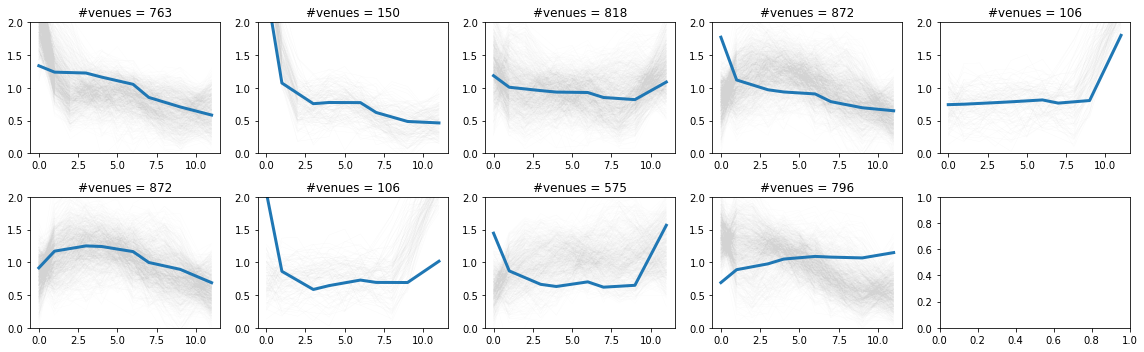

In [314]:
f, ax    = plt.subplots(2, 5, figsize=(16, 5)) 
indicies = [(i,j) for i in range(2) for j in range(5)]

for ind, curve in enumerate(curves):

    line    = curves_files['\t'.join([str(f) for f in curve])]
    curveid = line.strip().split('avg_curve_')[-1].split('_')[0]
    venues  = [line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/venues_in_' + curveid + '_4392.dat')]
    
    alpha_ = 0.15
    if len(venues) < 200:
        alpha_ = 0.3
    
    for v in venues:
        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   
        
        ax[indicies[ind]].plot(x, y, linewidth = 0.15, color = 'lightgrey', alpha = alpha_)
    
    xx = transform_ts(range(len(curve)), 11) 
    ax[indicies[ind]].plot(xx, curve, linewidth = 3)
    ax[indicies[ind]].set_ylim([0,2])
    ax[indicies[ind]].set_title('#venues = ' + str(len(venues)))

plt.tight_layout()
    

0 0 5 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_5_4392_venuesnum=796.dat 763
1 1 0 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_0_4392_venuesnum=150.dat 150
1 3 7 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=763.dat 872
2 2 8 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_8_4392_venuesnum=818.dat 818
2 6 6 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=179.dat 106
2 7 2 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_2_4392_venuesnum=133.dat 575
3 4 6 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_6_4392_venuesnum=106.dat 106
4 5 7 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_4392_venuesnum=872.dat 872
5 8 3 ../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_3_4392_venuesnum=575.dat 796


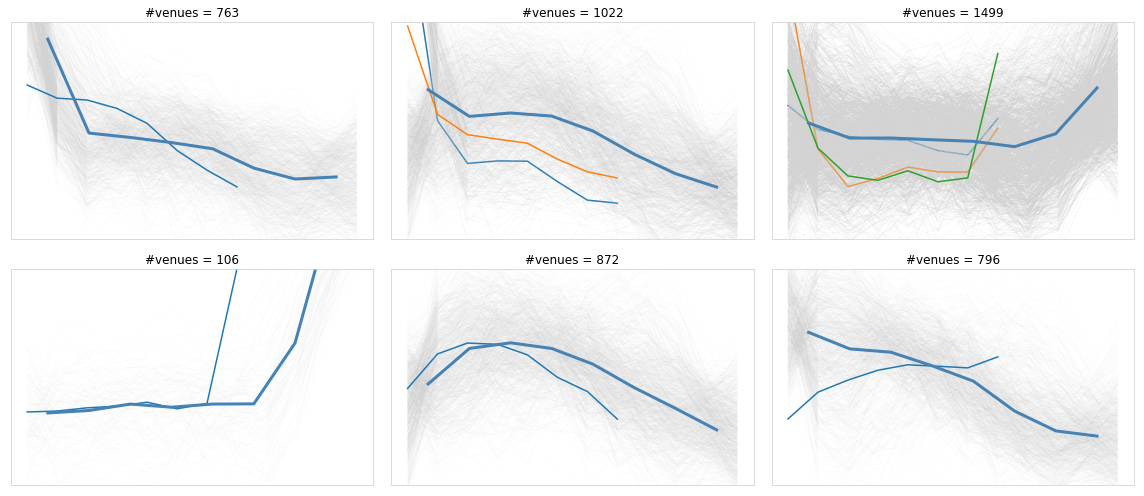

In [319]:
f, ax    = plt.subplots(2, 3, figsize=(16, 7)) 
indicies = [(i,j) for i in range(2) for j in range(3)]



for cluster, curveids in clusters_curves.items():
    
    venues = []
    ttt = []
    sss = []
    

    for curveid in curveids:

        lineee      = curves_files['\t'.join([str(f) for f in curves[curveid]])]
        ccccurveid  = curvefiles[curveid]#lineee.strip().split('avg_curve_')[-1].split('_')[0] 
        
        ccccurveid = curvefiles[curveid].split('avg_curve_')[-1].split('_')[0] 
        venues     += [line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/venues_in_' + ccccurveid + '_4392.dat')]       

        print cluster, curveid, ccccurveid, lineee, len([line.strip() for line in open('../ProcessedData/london/timeseries/senior_8_12/clusters_venues/10/venues_in_' + ccccurveid + '_4392.dat')]       )

        alpha_ = 0.15
        if len(venues) > 1000:
            alpha = 0.08

        for v in venues:
            y = venues_ts[v]
            x = transform_ts(range(len(y)), 11)   

            ttt += list(x)
            sss += list(y)

            ax[indicies[cluster]].plot(x, y, linewidth = 0.25, color = 'lightgrey', alpha = alpha_)

        
        #print cluster, curveid, len(venues)
        ax[indicies[cluster]].plot(curves[curveid])
        
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[indicies[cluster]].set_title('#venues = ' + str(len(venues)), fontsize = 14)
    ax[indicies[cluster]].plot(bx, by, linewidth = 3, color = 'steelblue')          


    ax[indicies[cluster]].set_title('#venues = ' + str(len(venues)))
    ax[indicies[cluster]].spines['bottom'].set_color('lightgrey')
    ax[indicies[cluster]].spines['top'].set_color('lightgrey')
    ax[indicies[cluster]].spines['left'].set_color('lightgrey')
    ax[indicies[cluster]].spines['right'].set_color('lightgrey')
    ax[indicies[cluster]].get_xaxis().set_visible(False)
    ax[indicies[cluster]].get_yaxis().set_visible(False)    
    ax[indicies[cluster]].set_ylim([0.2,1.8])       
     
        
plt.tight_layout()

# ===========================================================

# ==========================================================

360
1436
525
3386
2431
575
6


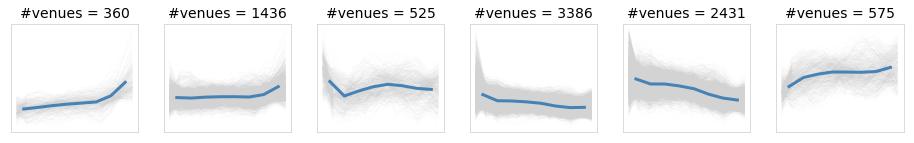

In [52]:
'''f, ax = plt.subplots(1, 6, figsize=(16, 2)) 

clusters_venues = {}
vvv = []





for c in range(6):

    ttt = []
    sss = []
    
    clusters_venues[c] = []
    venues = []
    
    
    for ind, line in enumerate(open('../ProcessedData/london/timeseries/senior_8_12/avg_curves_clusters/6_67/cluster_'+str(c)+'.dat')):
        
        NNN = line.strip().split('/avg_curve')[-2].split('/')[-1]
        n_n = line.strip().split('_')[5]
        n_c = line.strip().split('_')[6].replace('.dat', '')
        venuefile = outfolder + '/clusters_venues/' + NNN + '/' + 'venues_in_' + n_n + '_' + n_c + '.dat'  
        venues    += [line.strip() for line in open(venuefile)] 

        
    venues = list(set(venues))

    vvv += venues
    print len(venues)
    for v in venues:

        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   

        ttt += list(x)
        sss += list(y)

        clusters_venues[c].append((x,y))

        ax[c].plot(x, y, linewidth = 0.2, color = 'lightgrey', alpha = 0.15)



        ax[c].set_title('#venues = ' + str(len(venues)))
        ax[c].spines['bottom'].set_color('lightgrey')
        ax[c].spines['top'].set_color('lightgrey')
        ax[c].spines['left'].set_color('lightgrey')
        ax[c].spines['right'].set_color('lightgrey')
        ax[c].get_xaxis().set_visible(False)
        ax[c].get_yaxis().set_visible(False)
        
            
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[c].set_title('#venues = ' + str(len(venues)), fontsize = 14)
    ax[c].plot(bx, by, linewidth = 3, color = 'steelblue')            
    
        
print len(clusters_venues)
'''

360
1436
525
3386
2431
575


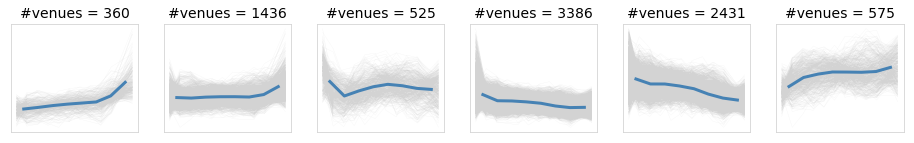

In [53]:
'''f, ax = plt.subplots(1, 6, figsize=(16, 2)) 


for c, data in clusters_venues.items():
    
    ttt = []
    sss = []
    print len(data)
    for d in data:
    
        x = list(d[0]) 
        y = list(d[1]) 
    
        ttt += x 
        sss += y

        
        
        ax[c].plot(x, y, linewidth = 0.2, color = 'lightgrey', alpha = 0.35)

        ax[c].set_title('#venues = ' + str(len(venues)))
        ax[c].spines['bottom'].set_color('lightgrey')
        ax[c].spines['top'].set_color('lightgrey')
        ax[c].spines['left'].set_color('lightgrey')
        ax[c].spines['right'].set_color('lightgrey')
        ax[c].get_xaxis().set_visible(False)
        ax[c].get_yaxis().set_visible(False)
        
            
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[c].set_title('#venues = ' + str(len(data)), fontsize = 14)
    ax[c].plot(bx, by, linewidth = 3, color = 'steelblue')    
'''    


# ============================================================

# ============================================================

In [ ]:
'''f, ax = plt.subplots(1, 6, figsize=(16, 2)) 

for ind, (c, vens) in enumerate(venue_dict.items()):
    for v in vens:
        ax[ind].plot(venues_ts[v], linewidth = 0.4, color = 'lightgrey', alpha= 0.3)
'''        

In [10]:
'''maturity   = 'senior_8_12'
method     = 'complete'
city       = 'london'
outfolder  = '../ProcessedData/' + city + '/timeseries/' + maturity  
fclusters  = [outfolder + '/avg_curves_clusters' + '/' + f for f in os.listdir(outfolder + '/avg_curves_clusters') if '.' not in f]

fclusters
'''

['../ProcessedData/london/timeseries/senior_8_12/avg_curves_clusters/6_58',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves_clusters/5_58',
 '../ProcessedData/london/timeseries/senior_8_12/avg_curves_clusters/4_58']

In [50]:
'''print venues_ts['4c092869bbc676b0aeab47d5']

[1.65187926 1.17700902 1.01559085 1.01257429 0.80107898 0.79849239
 0.46007972 0.51140614 1.3395489 ]


208


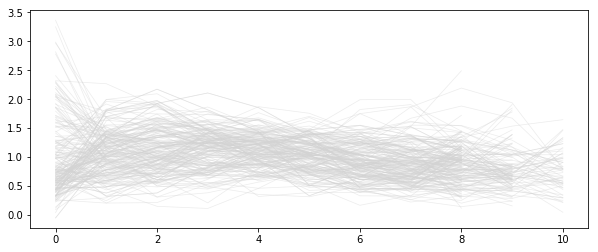

In [49]:
'''venues = [line.strip() for line in open(outfolder + '/clusters_venues/6/venues_in_493_4.dat')]
print len(venues)
f, ax = plt.subplots(1, 1, figsize=(10, 4)) 
for v in venues:
    ax.plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)
'''

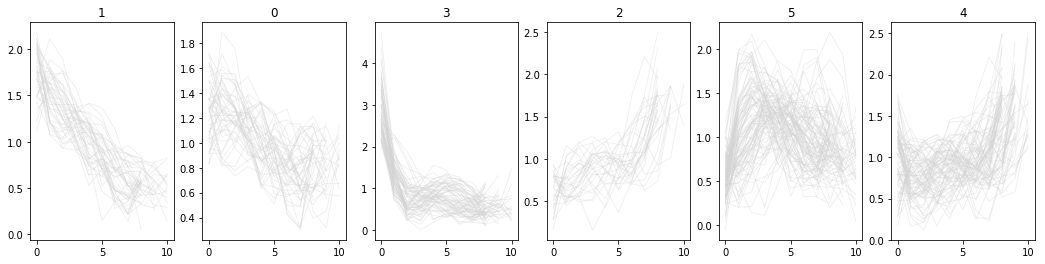

In [14]:
'''f, ax = plt.subplots(1, 6, figsize=(18, 4)) 

for ind, (c, vs) in enumerate(venue_dict.items()):
    
    if int(c) < 100:
        for v in vs:
            ax[ind].set_title(c)
            if v in venues_ts:
                ax[ind].plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)
'''    

In [21]:
'''venues = venues_in_493_2.dat   
    
f, ax = plt.subplots(1, 2, figsize=(10, 6)) 
for v in venues:
    ax[0].plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)
    
    
    
r_8_12/avg_curves/5/avg_curve_0_283.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_3_309.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_272.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_278.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_341.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_4_316.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_4_309.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/3/avg_curve_1_283.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_255.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_0_468.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_449.da    
'''

"venues = venues_in_493_2.dat   \n    \nf, ax = plt.subplots(1, 2, figsize=(10, 6)) \nfor v in venues:\n    ax[0].plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)\n    \n    \n    \nr_8_12/avg_curves/5/avg_curve_0_283.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_3_309.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_272.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_278.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_341.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_4_316.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_4_309.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/3/avg_curve_1_283.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_255.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_0_468.dat\n../ProcessedData/londo

In [ ]:
'''for folder in fclusters:
    
    if '6_48' in folder:
    
        files = [folder +'/' + fff for fff in os.listdir(folder)]

        cluster_venues = {}
        
        for fn in files:
        
            print fn
            
            cluster = fn.replace('.dat','').split('_')[-1]

            for line in open(fn):
                NNN = line.strip().split('/')[6]
              #  print NNN
                #if '5' == NNN:
                if 2 == 2:
                    n_c = line.strip().split('_')[5]
                    n_n = line.strip().split('_')[6].replace('.dat', '')

                    venuefile = outfolder + '/clusters_venues/' + NNN + '/' + 'venues_in_' + n_n + '_' + n_c + '.dat'  
                    venues    = [line.strip() for line in open(venuefile)] 

                    if cluster not in cluster_venues:
                        cluster_venues[cluster] = set(venues)
                    else:
                        cluster_venues[cluster].union(set(venues))

for s, v in cluster_venues.items():
    print s, len(v)
'''

In [ ]:
'''for ind, (cluster, venues) in enumerate(cluster_venues.items()):

    print cluster, len(venues)
'''

In [ ]:
'''f, ax = plt.subplots(6, 1, figsize=(6, 15)) 

for cluster, venues in cluster_venues.items():
    
    cluster  = int(cluster)
    print cluster, len(venues)
 
    ttt = []
    sss = []
    
    for v in venues:
        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   
     
        ttt += list(x)
        sss += list(y)
    
        ax[cluster].plot(x, y, linewidth = 0.2, color = 'lightgrey', alpha = 0.75)
        
        
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[cluster].set_title('Number of venues = ' + str(len(venues)), fontsize = 14)
    ax[cluster].plot(bx, by, linewidth = 3, color = 'steelblue')
    
    ax[cluster].spines['bottom'].set_color('lightgrey')
    ax[cluster].spines['top'].set_color('lightgrey')
    ax[cluster].spines['left'].set_color('lightgrey')
    ax[cluster].spines['right'].set_color('lightgrey')
    ax[cluster].get_xaxis().set_visible(False)
    ax[cluster].get_yaxis().set_visible(False)
    ax[cluster].set_ylim([0.5, 1.6])
    
#plt.savefig('../ProcessedData/' + city + '/timeseries/' + maturity + '/avg_curves_clusters/averaging_venues_6_52')
'''